<a href="https://colab.research.google.com/github/Anantbir-S/AER850_Project3/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import YOLO from Ultralytics
from ultralytics import YOLO

# Verify dataset paths and navigate to the dataset directory
import os
dataset_path = "/content/drive/MyDrive/Project 3 Data"
train_images = os.path.join(dataset_path, "train/images")
val_images = os.path.join(dataset_path, "valid/images")
data_yaml = os.path.join(dataset_path, "data.yaml")
test_images_path = os.path.join(dataset_path, "test/images")  # Correct test images path

# Check if the dataset paths exist
print(f"Train Images Path Exists: {os.path.exists(train_images)}")
print(f"Validation Images Path Exists: {os.path.exists(val_images)}")
print(f"data.yaml Path Exists: {os.path.exists(data_yaml)}")
print(f"Test Images Path Exists: {os.path.exists(test_images_path)}")

# Navigate to dataset directory
%cd {dataset_path}

# Train YOLOv8 model
model = YOLO('yolov8n.pt')  # Load YOLOv8 Nano pretrained weights

model.train(
    data='data.yaml',
    epochs=100,
    batch=8,
    imgsz=900,
    name='pcb_component_detector4',
    amp=True  # Mixed precision (should already be enabled)
)

# Validate the trained model
metrics = model.val()
print(metrics)  # Outputs metrics like mAP50, mAP95, Precision, and Recall

# Perform inference on test images
results = model.predict(
    source=test_images_path,  # Corrected path to your test images folder
    save=True  # Save predictions
)

# Notify where the predictions are saved
print(f"Predictions saved at: {os.path.join(dataset_path, 'runs/predict/exp')}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 14.8 MB/s eta 0:00:00
Mounted at /content/drive
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Train Images Path Exists: True
Validation Images Path Exists: True
data.yaml Path Exists: True
Test Images Path Exists: True
/content/drive/MyDrive/Project 3 Data
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=900, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_component_detector44, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, singl

100%|██████████| 755k/755k [00:00<00:00, 15.9MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/Project 3 Data/train/labels.cache... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Project 3 Data/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/pcb_component_detector44/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 928 train, 928 val
Using 8 dataloader workers
Logging results to runs/detect/pcb_component_detector44
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.3G        2.2        4.2      1.266       2387        928: 100%|██████████| 68/68 [00:23<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        105      19108       0.83     0.0517     0.0551       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.2G      2.276       3.12      1.123       2541        928: 100%|██████████| 68/68 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        105      19108      0.621     0.0919     0.0737      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      15.1G      2.202      2.615      1.091       3035        928: 100%|██████████| 68/68 [00:21<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        105      19108      0.422      0.111      0.101     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.97G      2.171      2.338      1.083       2923        928: 100%|██████████| 68/68 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        105      19108      0.593      0.149      0.132     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.6G      2.066      2.139      1.062       3820        928: 100%|██████████| 68/68 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        105      19108      0.606      0.171      0.147     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.9G      1.996      1.991      1.056       2279        928: 100%|██████████| 68/68 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        105      19108      0.634      0.184      0.169      0.099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.19G      1.964      1.906      1.044       2484        928: 100%|██████████| 68/68 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        105      19108      0.528      0.254      0.212      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      15.6G      1.985      1.859      1.033       2415        928: 100%|██████████| 68/68 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        105      19108      0.538      0.245      0.232      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.9G       1.94      1.812      1.036       2995        928: 100%|██████████| 68/68 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        105      19108      0.565      0.293      0.241      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.8G      1.967      1.796      1.041       2775        928: 100%|██████████| 68/68 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        105      19108      0.558      0.279      0.277      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.85G      1.903      1.732      1.017       2467        928: 100%|██████████| 68/68 [00:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        105      19108      0.579      0.312      0.285      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.5G      1.903      1.695      1.023       1641        928: 100%|██████████| 68/68 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        105      19108      0.605      0.293      0.315      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.31G      1.864      1.658      1.012       2215        928: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        105      19108      0.561       0.33      0.323      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.75G      1.868      1.626      1.013       2417        928: 100%|██████████| 68/68 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        105      19108      0.607      0.327      0.335       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.83G      1.864        1.6      1.006       2193        928: 100%|██████████| 68/68 [00:20<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        105      19108      0.461      0.349      0.329      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.2G      1.824      1.555      1.004       1794        928: 100%|██████████| 68/68 [00:21<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        105      19108      0.451       0.36      0.356      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        15G      1.796      1.546      1.004       3307        928: 100%|██████████| 68/68 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        105      19108      0.594      0.358      0.382      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.1G      1.762      1.522     0.9967       2033        928: 100%|██████████| 68/68 [00:20<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        105      19108      0.467      0.338      0.369      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      15.3G      1.795      1.501     0.9884       2402        928: 100%|██████████| 68/68 [00:21<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        105      19108      0.518      0.375      0.396      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      15.5G      1.768      1.483     0.9897       3295        928: 100%|██████████| 68/68 [00:20<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        105      19108      0.473      0.404      0.409      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.8G      1.764      1.457     0.9926       2779        928: 100%|██████████| 68/68 [00:20<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        105      19108      0.524      0.394      0.411      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        12G      1.748      1.438     0.9824       2463        928: 100%|██████████| 68/68 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        105      19108      0.619      0.376      0.405      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.9G      1.756      1.448     0.9875       2576        928: 100%|██████████| 68/68 [00:21<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        105      19108      0.471      0.421      0.431      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.69G      1.716      1.417     0.9826       2329        928: 100%|██████████| 68/68 [00:20<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        105      19108      0.481      0.411      0.426      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        15G      1.728      1.395     0.9823       2674        928: 100%|██████████| 68/68 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        105      19108      0.604      0.405      0.431      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.34G      1.756      1.383     0.9896       2371        928: 100%|██████████| 68/68 [00:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        105      19108      0.522       0.44      0.465      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.2G      1.732      1.371     0.9797       2223        928: 100%|██████████| 68/68 [00:20<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        105      19108      0.536      0.455      0.466      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.1G      1.733      1.353     0.9781       2387        928: 100%|██████████| 68/68 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        105      19108      0.531      0.462       0.48      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      15.4G      1.718       1.36     0.9769       2397        928: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        105      19108      0.516      0.495       0.49      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.4G      1.719      1.334     0.9775       2537        928: 100%|██████████| 68/68 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        105      19108      0.558      0.462      0.499       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.19G      1.696       1.33     0.9686       2474        928: 100%|██████████| 68/68 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        105      19108      0.545       0.52      0.518       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.6G      1.727      1.312      0.971       2305        928: 100%|██████████| 68/68 [00:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        105      19108      0.564      0.506      0.524      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.8G      1.673      1.304     0.9638       2322        928: 100%|██████████| 68/68 [00:20<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        105      19108      0.578      0.502      0.531      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.3G      1.685      1.283     0.9617       2717        928: 100%|██████████| 68/68 [00:21<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        105      19108      0.586      0.478      0.513      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.5G      1.671      1.292     0.9688       3174        928: 100%|██████████| 68/68 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        105      19108      0.588      0.507      0.533      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       8.1G      1.676      1.273     0.9674       1822        928: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        105      19108      0.579      0.528      0.554      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      15.2G      1.638      1.262     0.9569       3218        928: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        105      19108      0.629      0.501      0.531      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.34G      1.676      1.253     0.9652       3611        928: 100%|██████████| 68/68 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        105      19108      0.622      0.508      0.553      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.97G      1.637      1.237     0.9601       2506        928: 100%|██████████| 68/68 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        105      19108       0.66      0.497      0.559      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.58G      1.647      1.264     0.9587       2351        928: 100%|██████████| 68/68 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        105      19108      0.629      0.525      0.569      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.62G      1.628      1.219     0.9602       2304        928: 100%|██████████| 68/68 [00:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        105      19108      0.596      0.558      0.578      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.97G      1.651      1.233     0.9605       1964        928: 100%|██████████| 68/68 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        105      19108      0.623      0.558      0.582      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.6G      1.626      1.208     0.9629       2705        928: 100%|██████████| 68/68 [00:20<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        105      19108      0.642      0.546      0.586      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.3G      1.623        1.2     0.9504       2626        928: 100%|██████████| 68/68 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        105      19108      0.669      0.541      0.592      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.7G      1.614      1.201     0.9495       1794        928: 100%|██████████| 68/68 [00:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        105      19108      0.691      0.549      0.596      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.42G      1.647      1.187     0.9518       1689        928: 100%|██████████| 68/68 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        105      19108      0.694      0.555      0.606      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.2G      1.609      1.177     0.9477       2028        928: 100%|██████████| 68/68 [00:20<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        105      19108      0.715      0.544      0.611      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.5G      1.574      1.169     0.9468       2605        928: 100%|██████████| 68/68 [00:20<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        105      19108      0.664      0.556      0.597      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.5G      1.622      1.183     0.9512       1971        928: 100%|██████████| 68/68 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        105      19108      0.634      0.571        0.6      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      15.1G       1.62      1.186     0.9485       2129        928: 100%|██████████| 68/68 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        105      19108      0.669      0.594      0.624      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.3G        1.6      1.154     0.9429       1602        928: 100%|██████████| 68/68 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        105      19108      0.753      0.557      0.629      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.8G      1.612      1.173     0.9474       1954        928: 100%|██████████| 68/68 [00:21<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        105      19108      0.696      0.567       0.62      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.64G      1.592       1.16     0.9474       2437        928: 100%|██████████| 68/68 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        105      19108      0.672      0.568      0.619      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.5G       1.57      1.131     0.9347       2624        928: 100%|██████████| 68/68 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        105      19108      0.699      0.562       0.61      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.5G       1.58      1.139     0.9417       1871        928: 100%|██████████| 68/68 [00:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        105      19108      0.716      0.575      0.639      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.8G      1.568      1.126     0.9372       2008        928: 100%|██████████| 68/68 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        105      19108      0.717      0.581      0.638      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.05G      1.555       1.12     0.9392       2971        928: 100%|██████████| 68/68 [00:20<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        105      19108      0.723      0.601      0.653      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        14G      1.557      1.108     0.9352       3084        928: 100%|██████████| 68/68 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        105      19108      0.735      0.568      0.638      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.1G      1.588      1.126      0.936       3269        928: 100%|██████████| 68/68 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        105      19108      0.711      0.593      0.645      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.5G      1.553      1.112     0.9324       2411        928: 100%|██████████| 68/68 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        105      19108      0.768      0.595      0.665      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.7G      1.558      1.099      0.938       2725        928: 100%|██████████| 68/68 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        105      19108      0.692      0.599      0.648      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.1G      1.561      1.098     0.9341       2558        928: 100%|██████████| 68/68 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        105      19108      0.765      0.591      0.663      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.6G      1.546      1.104     0.9302       3710        928: 100%|██████████| 68/68 [00:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        105      19108      0.735      0.618      0.661      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.8G      1.535      1.079     0.9288       2328        928: 100%|██████████| 68/68 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        105      19108      0.714      0.603      0.656      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.2G      1.554      1.098     0.9374       2166        928: 100%|██████████| 68/68 [00:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        105      19108      0.718      0.601      0.661      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.62G      1.515      1.065     0.9333       1654        928: 100%|██████████| 68/68 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        105      19108      0.769      0.595      0.663      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.9G      1.532      1.062     0.9314       3461        928: 100%|██████████| 68/68 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        105      19108      0.725      0.627      0.669      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.82G      1.523      1.057     0.9273       2712        928: 100%|██████████| 68/68 [00:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all        105      19108      0.747      0.629      0.675      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      13.2G      1.528      1.061     0.9288       2934        928: 100%|██████████| 68/68 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        105      19108      0.748      0.618      0.672      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.9G      1.535      1.067     0.9298       2284        928: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        105      19108      0.753      0.608      0.675       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.98G      1.516      1.052     0.9225       3056        928: 100%|██████████| 68/68 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        105      19108      0.733      0.632      0.682      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.2G      1.526      1.063     0.9294       1418        928: 100%|██████████| 68/68 [00:21<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        105      19108      0.781      0.607      0.674      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.5G      1.518      1.041     0.9284       2383        928: 100%|██████████| 68/68 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        105      19108      0.775      0.608      0.676      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      15.4G      1.502      1.047     0.9275       2931        928: 100%|██████████| 68/68 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        105      19108      0.724      0.637      0.681      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      14.5G       1.52      1.049     0.9344       1797        928: 100%|██████████| 68/68 [00:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        105      19108      0.728      0.641      0.679      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.38G      1.507      1.047     0.9221       1850        928: 100%|██████████| 68/68 [00:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        105      19108      0.768      0.618      0.684      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.3G      1.488      1.027     0.9272       1655        928: 100%|██████████| 68/68 [00:20<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        105      19108      0.758      0.632      0.692      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       8.7G      1.523      1.048     0.9261       1936        928: 100%|██████████| 68/68 [00:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        105      19108      0.756      0.631      0.688      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.1G      1.514      1.036     0.9241       2235        928: 100%|██████████| 68/68 [00:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        105      19108      0.769      0.631      0.693      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.8G      1.499       1.03     0.9242       2857        928: 100%|██████████| 68/68 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        105      19108       0.75      0.635      0.684      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      13.2G      1.494      1.029     0.9221       2805        928: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        105      19108      0.784      0.627      0.692      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      13.6G      1.496      1.029      0.919       2580        928: 100%|██████████| 68/68 [00:21<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        105      19108      0.785      0.633      0.697      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.5G      1.518      1.034      0.926       2423        928: 100%|██████████| 68/68 [00:21<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        105      19108      0.754      0.643      0.698      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       7.9G      1.496      1.015     0.9191       2381        928: 100%|██████████| 68/68 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        105      19108      0.748      0.645      0.697      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.99G      1.515      1.026     0.9263       3923        928: 100%|██████████| 68/68 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        105      19108      0.786      0.635      0.701      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.8G      1.486      1.021     0.9225       1500        928: 100%|██████████| 68/68 [00:20<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        105      19108      0.778      0.633      0.699      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.59G      1.492      1.009     0.9197       2395        928: 100%|██████████| 68/68 [00:21<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        105      19108      0.836       0.62      0.701        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      14.4G      1.514       1.03     0.9185       2915        928: 100%|██████████| 68/68 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        105      19108      0.812      0.628      0.706      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.7G      1.483      1.016     0.9195       2694        928: 100%|██████████| 68/68 [00:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        105      19108      0.806      0.628      0.704      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.73G      1.465      1.002     0.9109       1664        928: 100%|██████████| 68/68 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        105      19108      0.832      0.616      0.702      0.505


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       9.2G      1.516      1.082     0.9277       1667        928: 100%|██████████| 68/68 [00:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        105      19108      0.774      0.624      0.687      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.46G      1.486      1.035     0.9186       1717        928: 100%|██████████| 68/68 [00:17<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        105      19108      0.766      0.627      0.686      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.23G      1.481      1.017     0.9186       1647        928: 100%|██████████| 68/68 [00:17<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        105      19108      0.763      0.625      0.687       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.6G      1.481      1.008     0.9184       2094        928: 100%|██████████| 68/68 [00:17<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        105      19108      0.795      0.622      0.694      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.3G      1.462     0.9977     0.9149       1324        928: 100%|██████████| 68/68 [00:17<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        105      19108       0.82      0.618        0.7      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.1G      1.475      1.001     0.9199       1563        928: 100%|██████████| 68/68 [00:17<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        105      19108      0.779      0.634        0.7      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.69G      1.452     0.9916      0.915       1334        928: 100%|██████████| 68/68 [00:16<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        105      19108      0.768       0.64      0.699      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.3G      1.469     0.9987     0.9133       1543        928: 100%|██████████| 68/68 [00:17<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        105      19108       0.79      0.636      0.704      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.42G      1.461     0.9947     0.9136       1266        928: 100%|██████████| 68/68 [00:17<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        105      19108      0.783      0.642      0.701      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.75G      1.443     0.9848     0.9094       1023        928: 100%|██████████| 68/68 [00:17<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        105      19108      0.816      0.624      0.705      0.505



100 epochs completed in 0.689 hours.
Optimizer stripped from runs/detect/pcb_component_detector44/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/pcb_component_detector44/weights/best.pt, 6.3MB

Validating runs/detect/pcb_component_detector44/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.44s/it]


                   all        105      19108       0.81      0.627      0.705      0.508
                Button         14         45      0.935      0.889      0.963      0.796
             Capacitor        104       7251      0.796      0.366      0.541      0.281
             Connector         76        659      0.787      0.875      0.897      0.683
                 Diode         11         53      0.875      0.358      0.437      0.312
Electrolytic Capacitor         15        160      0.845      0.894      0.934      0.664
                    IC         95       1322        0.8      0.902      0.916      0.687
              Inductor         12         45      0.866      0.556      0.663      0.535
                   Led         18        127      0.796      0.646      0.709      0.501
                  Pads         20        143      0.729       0.17      0.279      0.182
                  Pins         10        151      0.594      0.834      0.822      0.595
              Resisto

val: Scanning /content/drive/MyDrive/Project 3 Data/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]


                   all        105      19108      0.803      0.638      0.709      0.514
                Button         14         45      0.891      0.911      0.961      0.798
             Capacitor        104       7251      0.782      0.378      0.542      0.285
             Connector         76        659      0.786      0.885      0.902      0.688
                 Diode         11         53      0.867      0.371      0.437      0.314
Electrolytic Capacitor         15        160      0.834      0.887      0.941       0.67
                    IC         95       1322      0.787      0.905      0.917       0.69
              Inductor         12         45      0.859      0.556      0.677      0.546
                   Led         18        127      0.814      0.638      0.703      0.506
                  Pads         20        143      0.765      0.238      0.305      0.197
                  Pins         10        151      0.584      0.861      0.829      0.599
              Resisto


image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/ardmega.jpg: 832x928 1 Button, 11 Capacitors, 8 Connectors, 7 ICs, 2 Leds, 2 Padss, 19 Resistors, 38.4ms
Speed: 6.4ms preprocess, 38.4ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 928)
Results saved to runs/detect/predict


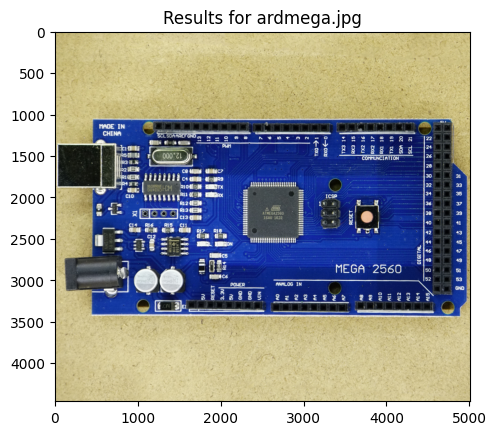


image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/arduno.jpg: 640x928 15 Capacitors, 9 Connectors, 1 Diode, 2 Electrolytic Capacitors, 5 ICs, 4 Leds, 18 Resistors, 9.8ms
Speed: 4.3ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/predict


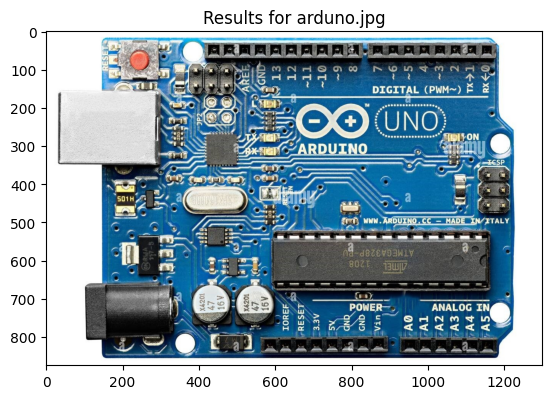


image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/rasppi.jpg: 640x928 13 Capacitors, 12 Connectors, 1 Electrolytic Capacitor, 12 ICs, 3 Inductors, 1 Led, 20 Resistors, 1 Switch, 8.8ms
Speed: 4.5ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/predict


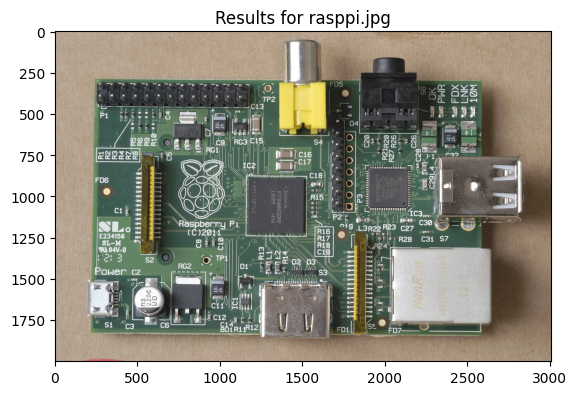

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load the model
model = YOLO('runs/detect/pcb_component_detector44/weights/best.pt')

# Define the evaluation image paths
evaluation_images = [
    '/content/drive/MyDrive/Project 3 Data/evaluation/ardmega.jpg',
    '/content/drive/MyDrive/Project 3 Data/evaluation/arduno.jpg',
    '/content/drive/MyDrive/Project 3 Data/evaluation/rasppi.jpg'
]

# Run predictions and save the results
for image_path in evaluation_images:
    results = model.predict(image_path, conf=0.25, iou=0.45, save=True)

    # Display the predictions
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Results for {image_path.split('/')[-1]}")
    plt.show()

# Check the output directory (e.g., 'runs/predict')



image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/ardmega.jpg: 832x928 1 Button, 11 Capacitors, 8 Connectors, 7 ICs, 2 Leds, 2 Padss, 19 Resistors, 12.3ms
Speed: 6.3ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 832, 928)
Results saved to runs/detect/predict6


<ipython-input-9-50ce8e1ce692>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confidence = float(result.conf.cpu().numpy())  # Extract scalar confidence score
<ipython-input-9-50ce8e1ce692>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_id = int(result.cls.cpu().numpy())  # Extract scalar class index


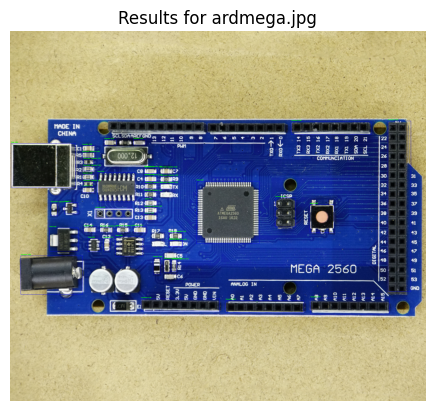


image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/arduno.jpg: 640x928 15 Capacitors, 9 Connectors, 1 Diode, 2 Electrolytic Capacitors, 5 ICs, 4 Leds, 18 Resistors, 9.5ms
Speed: 4.3ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/predict6


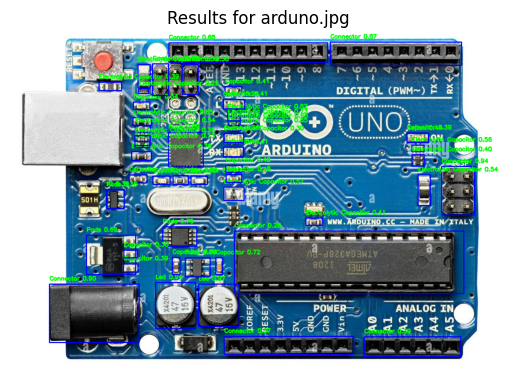


image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/rasppi.jpg: 640x928 13 Capacitors, 12 Connectors, 1 Electrolytic Capacitor, 12 ICs, 3 Inductors, 1 Led, 20 Resistors, 1 Switch, 9.4ms
Speed: 4.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/predict6


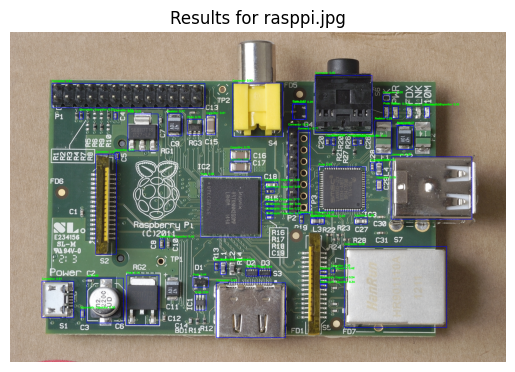

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load the model
model = YOLO('runs/detect/pcb_component_detector44/weights/best.pt')

# Define the class names (make sure these match your model's training classes)
class_names = [
    'Button', 'Capacitor', 'Connector', 'IC', 'Led', 'Pads', 'Resistor',
    'Switch', 'Inductor', 'Diode', 'Electrolytic Capacitor'
]

# Define the evaluation image paths
evaluation_images = [
    '/content/drive/MyDrive/Project 3 Data/evaluation/ardmega.jpg',
    '/content/drive/MyDrive/Project 3 Data/evaluation/arduno.jpg',
    '/content/drive/MyDrive/Project 3 Data/evaluation/rasppi.jpg'
]

# Run predictions and save the results
for image_path in evaluation_images:
    results = model.predict(image_path, conf=0.25, iou=0.45, save=True)

    # Load the image
    img = cv2.imread(image_path)

    # Draw predictions
    for result in results[0].boxes:
        box = result.xyxy[0].cpu().numpy()  # Bounding box coordinates
        confidence = float(result.conf.cpu().numpy())  # Extract scalar confidence score
        class_id = int(result.cls.cpu().numpy())  # Extract scalar class index

        # Check if class_id is valid
        if class_id < 0 or class_id >= len(class_names):
            print(f"Warning: class_id {class_id} is out of range for class_names.")
            continue

        # Get the label
        label = f"{class_names[class_id]} {confidence:.2f}"

        # Draw the bounding box and label on the image
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Bounding box
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert the image to RGB for plotting
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Results for {image_path.split('/')[-1]}")
    plt.axis('off')
    plt.show()



image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/ardmega.jpg: 832x928 1 Button, 11 Capacitors, 8 Connectors, 7 ICs, 2 Leds, 2 Padss, 19 Resistors, 12.3ms
Speed: 6.2ms preprocess, 12.3ms inference, 1.4ms postprocess per image at shape (1, 3, 832, 928)
Results saved to runs/detect/predict8


<ipython-input-12-a450ed08e7c5>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_id = int(result.cls.cpu().numpy())  # Class index
<ipython-input-12-a450ed08e7c5>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confidence = float(result.conf.cpu().numpy())  # Confidence score


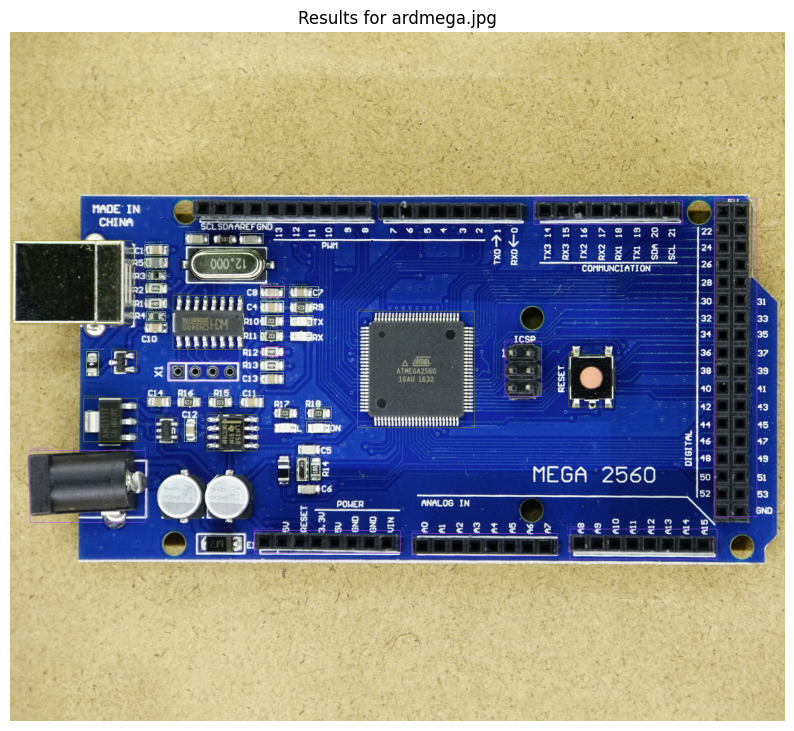

Results saved to /content/drive/MyDrive/Project 3 Data/results/ardmega.jpg

image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/arduno.jpg: 640x928 15 Capacitors, 9 Connectors, 1 Diode, 2 Electrolytic Capacitors, 5 ICs, 4 Leds, 18 Resistors, 9.5ms
Speed: 3.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/predict8


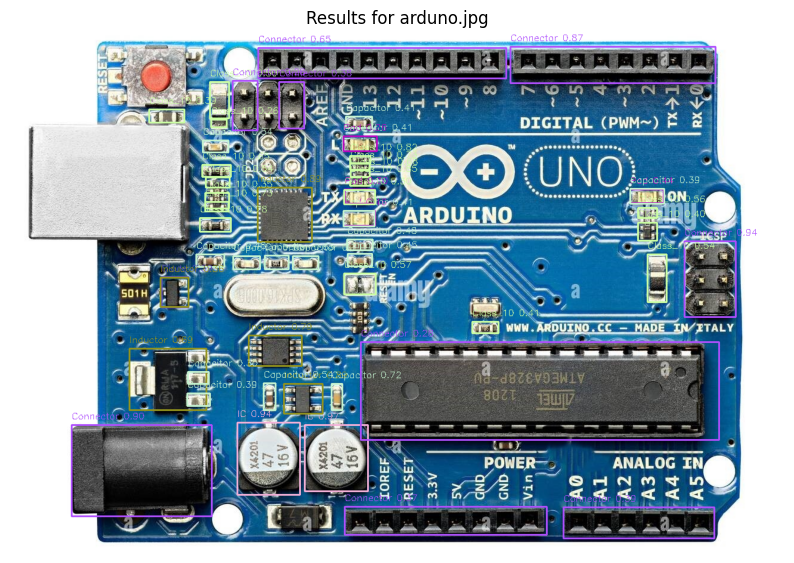

Results saved to /content/drive/MyDrive/Project 3 Data/results/arduno.jpg

image 1/1 /content/drive/MyDrive/Project 3 Data/evaluation/rasppi.jpg: 640x928 13 Capacitors, 12 Connectors, 1 Electrolytic Capacitor, 12 ICs, 3 Inductors, 1 Led, 20 Resistors, 1 Switch, 8.7ms
Speed: 4.9ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 928)
Results saved to runs/detect/predict8


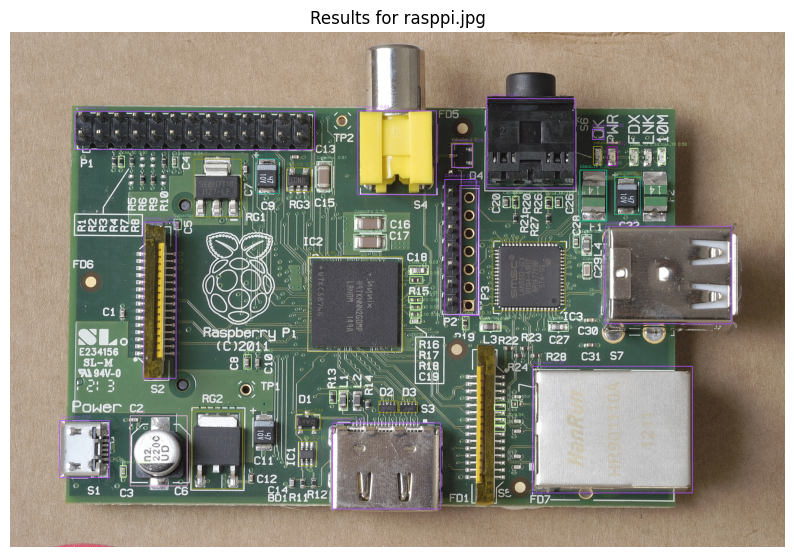

Results saved to /content/drive/MyDrive/Project 3 Data/results/rasppi.jpg


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the trained YOLO model
model = YOLO('/content/drive/MyDrive/Project 3 Data/runs/detect/pcb_component_detector44/weights/best.pt')

# Define class names (ensure this matches the training data, adding placeholders for unknown classes if needed)
class_names = [
    'Button', 'Capacitor', 'Connector', 'Diode', 'IC',
    'Inductor', 'Led', 'Pad', 'Pins', 'Resistor',
    'Class_10', 'Class_11'  # Add placeholders for missing classes
]

# Colors for each class
colors = {class_name: tuple(np.random.randint(0, 255, size=3).tolist()) for class_name in class_names}

# Define the evaluation image paths
evaluation_images = [
    '/content/drive/MyDrive/Project 3 Data/evaluation/ardmega.jpg',
    '/content/drive/MyDrive/Project 3 Data/evaluation/arduno.jpg',
    '/content/drive/MyDrive/Project 3 Data/evaluation/rasppi.jpg'
]

# Directory to save the results
output_dir = "/content/drive/MyDrive/Project 3 Data/results"
os.makedirs(output_dir, exist_ok=True)

# Process each image
for image_path in evaluation_images:
    # Run predictions
    results = model.predict(image_path, conf=0.25, iou=0.45, save=True)

    # Load the image
    img = cv2.imread(image_path)

    # Draw bounding boxes and labels
    for result in results[0].boxes:
        box = result.xyxy[0]  # Bounding box coordinates
        class_id = int(result.cls.cpu().numpy())  # Class index
        confidence = float(result.conf.cpu().numpy())  # Confidence score

        # Safeguard for out-of-range class IDs
        if class_id < len(class_names):
            class_name = class_names[class_id]
        else:
            class_name = f"Unknown_{class_id}"
            print(f"Warning: Predicted class_id {class_id} is out of range for class_names.")

        # Get color for the class
        color = colors.get(class_name, (255, 255, 255))  # Default to white if class not found

        # Draw bounding box and label
        label = f"{class_name} {confidence:.2f}"
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)  # Bounding box
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    # Save the annotated image
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(output_path, img)

    # Display the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Results for {os.path.basename(image_path)}")
    plt.axis("off")
    plt.show()

    print(f"Results saved to {output_path}")
